refs https://qiita.com/s-yonekura/items/7cdc99ba444cdbd4e880

In [1]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import product
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Yu Gothic'
plt.rcParams['font.size'] = 17

In [35]:
# 各パラメータ
A = np.array([[0.5, 0.4], [0.6, 0.3]])
B = np.eye(2)
P = np.array([[0.9, 0.3], [0.3, 0.9]])
Σ = 0.3 * P
R = 0.5 * P
T = 100
x0 = multivariate_normal.rvs(cov=P, random_state=44)

In [36]:
x0

array([-0.13957494,  1.30242226])

In [37]:
# x_t = A * x_t-1 + u_t
# y_t = B * x_t + v_t
# T + 1なのはx_t-1の分
x = np.zeros((2, T + 1))
y = np.zeros((2, T))
display(x)
display(y)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [38]:
# xの始めの列にmultivariate_normal.rvsで生成した数値を入れる
# Pythonは0始まり
x[:,0] = x0
display(x)

array([[-0.13957494,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [39]:
# x_t = A * x_t-1 + u_t
# y_t = B * x_t + v_t
# y[:,i]なのはxがT+1の長さなので帳尻を合わせてる
for i in range(T):
    x[:, i+1] = A @ x[:,i] + multivariate_normal.rvs(cov=Σ)
    y[:,i] = B @ x[:,i+1] + multivariate_normal.rvs(cov=R)

In [40]:
# * とすると同列同士を掛けてしまうため@にする
display(A)
display(x[:,0])
display(A * x[:,0])
display(A @ x[:,0])

array([[0.5, 0.4],
       [0.6, 0.3]])

array([-0.13957494,  1.30242226])

array([[-0.06978747,  0.5209689 ],
       [-0.08374496,  0.39072668]])

array([0.45118143, 0.30698171])

In [41]:
# xの配列を100にするために最初の値を切り落とす
x = x[:,1:T+1]
data = y

In [42]:
display(x)
display(data)

array([[ 0.70124109,  0.74846484,  1.21039545,  0.1551225 , -0.26264609,
        -0.94427852,  0.53575072,  0.68855502,  2.00362782,  0.38523909,
         0.98054306,  0.69885899,  0.69573741,  1.44942189,  1.05667426,
         1.73968813,  1.03710779,  0.91448391, -0.02015581,  0.05060518,
         1.57651748,  1.62190109,  0.76607366,  0.45883945, -0.07210289,
         1.17113169,  1.07848814,  1.20384702,  0.31853814, -0.45589868,
        -0.40445913, -0.35474428,  0.78128178,  1.06804125, -0.41829825,
        -0.5092798 , -0.02385276, -0.2216714 ,  0.53197191, -0.30328686,
        -0.20218545,  0.3941337 ,  0.39930511,  0.54024394,  1.11128029,
         0.83573897,  0.33582872,  0.57001631,  0.44208796, -0.37256449,
         0.05145212, -0.12684585,  0.39363249,  0.02062154,  0.57824845,
         0.66498821,  0.50775507,  1.25668126,  0.96328556,  1.18271804,
         1.68958132,  1.4196979 ,  1.62355827,  0.86117463,  1.52560567,
         1.98246345,  2.4224811 ,  2.67439237,  2.2

array([[-2.98770123e-01,  3.56043180e-01,  2.09448025e+00,
         1.08521725e+00, -1.19634634e+00, -1.55019091e+00,
         1.05146948e+00,  1.74040633e+00,  1.49189055e+00,
         2.78230156e-02,  8.33363219e-01,  6.13703097e-01,
         6.17876845e-03,  2.11052232e+00,  1.09105244e+00,
         2.51252796e+00,  1.86175873e+00, -2.08532803e-01,
         1.84540459e-01, -7.58872472e-01,  2.11568207e+00,
         1.79963981e+00,  3.12713197e-01, -2.80896220e-01,
        -9.59005221e-01,  7.66013358e-01,  1.17973689e+00,
         1.73936895e+00, -7.23305732e-01, -5.56855179e-01,
        -7.21266581e-01, -2.77911527e-01,  1.34492219e+00,
         1.64816747e+00, -4.89393881e-01, -8.65901967e-01,
         1.04310242e-01,  2.05032842e-01,  3.66964901e-01,
         9.77026934e-02, -6.71331817e-02,  1.12561578e+00,
        -3.57669330e-01,  4.61852557e-01,  2.51898221e+00,
         1.71371243e+00,  3.33656329e-01,  1.48657791e+00,
         7.71112582e-01,  4.99724392e-01, -7.50580245e-0

In [43]:
# 線形ガウス状態空間モデルならPCによる計算が可能
# 多変量正規分布のmu, sigmaを設定する
Q0 = P # 分散共分散行列
m0 = x0 # 平均ベクトル
display(m0, Q0)

array([-0.13957494,  1.30242226])

array([[0.9, 0.3],
       [0.3, 0.9]])

In [44]:
# 観測データyの列数
n = data.shape[1]

In [45]:
# 変数を設定
# 逐次的に更新するためにQ0,m0を多変量正規分布に従っていると仮定し、初期値とする
Qc = Q0
mc = m0
fm = [] # フィルタリング密度
fQ = []
pm = [] # 予測密度
pQ = []

In [46]:
for i in range(n):
    # 観測データ
    y = data[:,i]
    # 仮定した値を使い(初回のみ)予測密度を計算
    predmean = A @ mc
    predvar = A @ Qc @ A.T + Σ
    # 予測密度用配列に格納
    pm.append(predmean)
    pQ.append(predvar)
    
    # Eの計算(予測密度の分散と一緒) 
    E = A @ Qc @ A.T + Σ
    # フィルタリング密度を観測データy, 予測密度を用いて計算
    Qn = E @ (np.eye(2) - B.T @ np.linalg.inv(B @ E @ B.T + R) @ B @ E)
    mn = (np.eye(2) - E @ B.T @ np.linalg.inv(B @ E @ B.T + R) @ B) @ A @ mc + E @ B.T @ np.linalg.inv(B @ E @ B.T + R) @ y 
    # フィルタリング密度用配列に格納
    fm.append(mn)
    fQ.append(Qn)
    # 作成した最新の平均ベクトル、分散共分散行列で上書き
    Qc = Qn
    mc = mn

In [47]:
# フィルタリング密度
display(fm)
display(fQ)

[array([-0.07699661, -0.25428345]),
 array([0.20812148, 0.6038432 ]),
 array([1.14297528, 0.58426569]),
 array([0.97598177, 1.2050321 ]),
 array([-0.08100674,  0.11676888]),
 array([-0.71391555, -0.37133983]),
 array([0.24445336, 0.02181619]),
 array([0.91077507, 0.76537797]),
 array([1.030071  , 0.46671032]),
 array([0.4627181 , 1.10387365]),
 array([0.77474345, 0.83557047]),
 array([0.59999135, 0.19747712]),
 array([0.21017129, 0.35875739]),
 array([1.18697834, 1.19124223]),
 array([1.01986566, 0.66250877]),
 array([1.6258671 , 1.53366605]),
 array([1.60161176, 1.35538101]),
 array([0.66157358, 1.26148983]),
 array([0.55548609, 0.77175875]),
 array([-0.00332528,  0.48016095]),
 array([1.08443195, 0.60728606]),
 array([1.19637159, 0.66614808]),
 array([0.6449505 , 1.03612779]),
 array([0.31669798, 0.81245688]),
 array([-0.26040192, -0.42366646]),
 array([0.21333991, 0.09900809]),
 array([0.68563292, 0.81650902]),
 array([1.19956268, 1.14396986]),
 array([0.20806932, 0.47839093]),
 arr

[array([[0.26308234, 0.15056814],
        [0.15056814, 0.26762745]]),
 array([[0.21748044, 0.10513592],
        [0.10513592, 0.21868342]]),
 array([[0.20898933, 0.09672346],
        [0.09672346, 0.21033483]]),
 array([[0.20732974, 0.09506946],
        [0.09506946, 0.20868634]]),
 array([[0.20699931, 0.09474039],
        [0.09474039, 0.20835862]]),
 array([[0.2069334 , 0.09467473],
        [0.09467473, 0.20829322]]),
 array([[0.20692024, 0.09466163],
        [0.09466163, 0.20828017]]),
 array([[0.20691761, 0.09465901],
        [0.09465901, 0.20827756]]),
 array([[0.20691709, 0.09465849],
        [0.09465849, 0.20827704]]),
 array([[0.20691698, 0.09465838],
        [0.09465838, 0.20827694]]),
 array([[0.20691696, 0.09465836],
        [0.09465836, 0.20827692]]),
 array([[0.20691696, 0.09465836],
        [0.09465836, 0.20827692]]),
 array([[0.20691696, 0.09465836],
        [0.09465836, 0.20827691]]),
 array([[0.20691696, 0.09465836],
        [0.09465836, 0.20827691]]),
 array([[0.20691696,

In [48]:
# 予測密度
display(pm)
display(pQ)

[array([0.45118143, 0.30698171]),
 array([-0.14021168, -0.122483  ]),
 array([0.34559802, 0.30602585]),
 array([0.80519392, 0.86106488]),
 array([0.97000373, 0.94709869]),
 array([ 0.00620418, -0.01357338]),
 array([-0.50549371, -0.53975128]),
 array([0.13095315, 0.15321687]),
 array([0.76153872, 0.77607843]),
 array([0.70171963, 0.75805569]),
 array([0.67290851, 0.60879296]),
 array([0.72159991, 0.71551721]),
 array([0.37898652, 0.41923794]),
 array([0.2485886 , 0.23372999]),
 array([1.06998606, 1.06955967]),
 array([0.77493634, 0.81067203]),
 array([1.42639997, 1.43562008]),
 array([1.34295828, 1.36758136]),
 array([0.83538272, 0.77539109]),
 array([0.58644654, 0.56481928]),
 array([0.19040174, 0.14205312]),
 array([0.7851304 , 0.83284499]),
 array([0.86464503, 0.91766738]),
 array([0.73692637, 0.69780864]),
 array([0.48333174, 0.43375585]),
 array([-0.29966754, -0.28334109]),
 array([0.14627319, 0.15770637]),
 array([0.66942007, 0.65633246]),
 array([1.05736928, 1.06292856]),
 array

[array([[0.759, 0.585],
        [0.585, 0.783]]),
 array([[0.43881823, 0.25976157],
        [0.25976157, 0.44300064]]),
 array([[0.40141383, 0.22248915],
        [0.22248915, 0.4058234 ]]),
 array([[0.39459029, 0.21565913],
        [0.21565913, 0.39898674]]),
 array([[0.39325003, 0.21431837],
        [0.21431837, 0.39764548]]),
 array([[0.39298336, 0.21405158],
        [0.21405158, 0.39737857]]),
 array([[0.39293016, 0.21399835],
        [0.21399835, 0.39732532]]),
 array([[0.39291954, 0.21398773],
        [0.21398773, 0.39731469]]),
 array([[0.39291742, 0.2139856 ],
        [0.2139856 , 0.39731256]]),
 array([[0.39291699, 0.21398518],
        [0.21398518, 0.39731214]]),
 array([[0.39291691, 0.2139851 ],
        [0.2139851 , 0.39731206]]),
 array([[0.39291689, 0.21398508],
        [0.21398508, 0.39731204]]),
 array([[0.39291689, 0.21398508],
        [0.21398508, 0.39731204]]),
 array([[0.39291689, 0.21398508],
        [0.21398508, 0.39731204]]),
 array([[0.39291689, 0.21398508],
      

In [49]:
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
xy = np.array(list(product(x_grid, y_grid)))

In [50]:
# 事前分布
z1 = multivariate_normal.pdf(xy, cov = P)
# フィルタリング密度分布
filterdist = multivariate_normal.pdf(xy, mean=fm[99], cov=fQ[99])
# 予測分布
predictiondist = multivariate_normal.pdf(xy, mean=pm[98], cov=pQ[98])

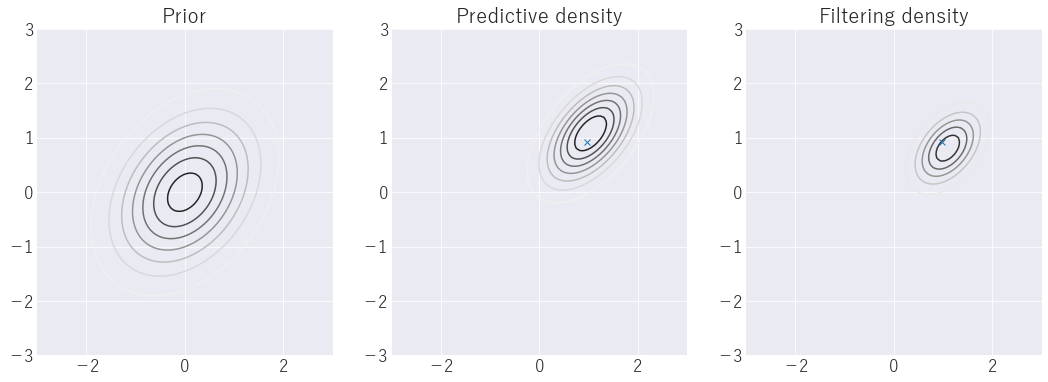

In [51]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.contour(x_grid, y_grid, z1.reshape(100, 100))
plt.title('Prior')
plt.subplot(132)
plt.contour(x_grid, y_grid, predictiondist.reshape(100, 100))
plt.plot(x[0, 99], x[1, 99], marker='x')
plt.title('Predictive density')
plt.subplot(133)
plt.contour(x_grid, y_grid, filterdist.reshape(100, 100))
plt.plot(x[0, 99], x[1, 99], marker='x')
plt.title('Filtering density')
plt.show()

In [87]:
# 状態空間推定
est_state1 = np.zeros((100, 100))
est_state2 = np.zeros((100, 100))
CIest1_lower = np.zeros(100) ; CIest1_upper = np.zeros(100)
CIest2_lower = np.zeros(100) ; CIest2_upper = np.zeros(100)

In [88]:
for i in range(100):
    est = multivariate_normal.rvs(fm[i], fQ[i], size=100).T
    est_state1[i,:] = est[0,:]
    est_state2[i,:] = est[1,:]
    CIest1_lower[i] = np.percentile(est_state1[i,:], 2.5) ; CIest1_upper[i] = np.percentile(est_state1[i,:], 97.5)
    CIest2_lower[i] = np.percentile(est_state2[i,:], 2.5) ; CIest2_upper[i] = np.percentile(est_state2[i,:], 97.5)

In [89]:
est1 = np.mean(est_state1, axis=1)
est2 = np.mean(est_state2, axis=1)

In [91]:
display(est1, est2)

array([-7.63989066e-02,  1.94427563e-01,  1.17455293e+00,  9.25992069e-01,
       -3.36314625e-03, -7.32937104e-01,  2.20341285e-01,  1.02195253e+00,
        1.05966483e+00,  3.97066845e-01,  7.34699747e-01,  5.67649555e-01,
        2.09678195e-01,  1.20857607e+00,  9.83632722e-01,  1.68304520e+00,
        1.60754732e+00,  6.46221317e-01,  5.45372913e-01,  7.09418399e-03,
        1.07857250e+00,  1.25759428e+00,  6.96858182e-01,  3.02488129e-01,
       -2.67275046e-01,  1.10608773e-01,  7.33509832e-01,  1.17865340e+00,
        1.55649688e-01, -5.34364357e-02, -2.32600197e-01, -2.85365546e-01,
        4.83479477e-01,  9.24648452e-01,  1.85370155e-01, -2.67551671e-01,
        2.48010248e-04,  2.79461529e-01,  3.96597768e-01,  7.27729079e-02,
        1.56430637e-01,  6.45236087e-01,  7.82919548e-02,  4.10191788e-01,
        1.43585513e+00,  1.13382097e+00,  6.67462214e-01,  9.81432469e-01,
        6.86387046e-01,  3.65775264e-01, -1.68666101e-01, -7.45805299e-01,
        2.75467784e-02, -

array([-0.30608597,  0.63580386,  0.57634757,  1.1322411 ,  0.13385611,
       -0.40951959, -0.00503983,  0.79652905,  0.43709091,  0.99786226,
        0.79430051,  0.15502158,  0.36646015,  1.19170272,  0.65139924,
        1.58987495,  1.3725162 ,  1.20589457,  0.75559449,  0.44684485,
        0.59976512,  0.69271141,  1.04890891,  0.81375587, -0.44292151,
        0.08859114,  0.8442896 ,  1.11288502,  0.40300531,  0.26237092,
       -0.17471363, -0.11535824, -0.0297398 ,  0.57203466,  0.49224121,
       -0.04709657,  0.37959462,  0.63591862, -0.06833221,  0.48250161,
        0.53777563,  0.32632266,  0.33585642,  0.89669319,  0.40121703,
        0.91966863,  0.56772112,  0.58862317,  0.05449621,  0.55897927,
       -0.02541263, -0.1123318 , -0.13891463, -0.09087061, -0.16396476,
        0.67629717,  0.7374181 ,  0.34654329,  0.89559664,  1.92399147,
        1.54634891,  1.20844829,  1.36021013,  1.04055877,  1.158966  ,
        1.57741137,  1.35091316,  1.60095254,  1.69761791,  1.47

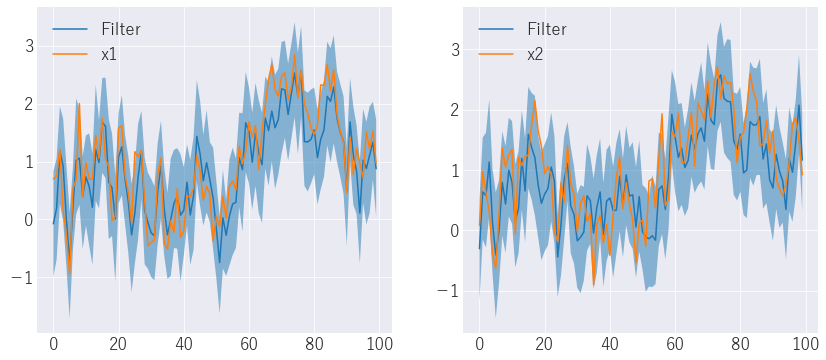

In [102]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(est1, label='Filter')
plt.plot(x[0,:], label='x1')
plt.legend(loc='upper left')
plt.fill_between(range(len(est1)), CIest1_lower, CIest1_upper, alpha=0.5)
plt.subplot(122)
plt.plot(est2, label='Filter')
plt.plot(x[1,:], label='x2')
plt.legend(loc='upper left')
plt.fill_between(range(len(est2)), CIest2_lower, CIest2_upper, alpha=0.5)
plt.show()